# Linear Regression From Scratch
This exercise is to implement a linear regression machine learning method from scratch without ML libraries to aid in understanding   

## Outline
- 1 - Data Pre-processing 
    - 1 - 1 Data exploration
    - 1 - 2 Data correlation
    - 1 - 3 Removing outliers
    - 1-4 Data splitting & Normalization
- 2 - Data Training
    - 2 - 1 Cost function
    - 2 - 2 Gradient descent
    - 2 - 3 Initial running of gradient function
    - 2 - 4 Tuning learning rate
- 3 - Evaluation of model

<a name="1"></a>
## 1 - Data Pre-processing

In [93]:
# Load relevant libraries
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.model_selection import train_test_split
import copy
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

<a name="1-1"></a>
### 1-1 Data exploration

In [94]:
# We will use Sklearn Diabetes Dataset
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [95]:
df = pd.DataFrame(data=data.data, columns=data['feature_names'])
df['target'] = data['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [96]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [98]:
# Check null data
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<a name="1-2"></a>
### 1-2 Data correlation

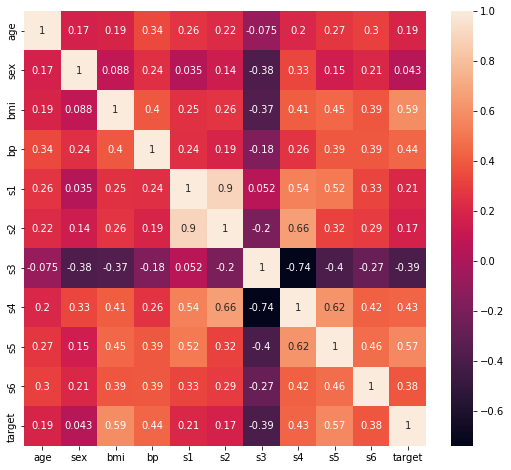

In [99]:
# Check correlation of each feature
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [100]:
# It is noticed that 'sex' has low correlation to target, which could be ommitted
df.drop(['sex'], axis=1, inplace=True)
df

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


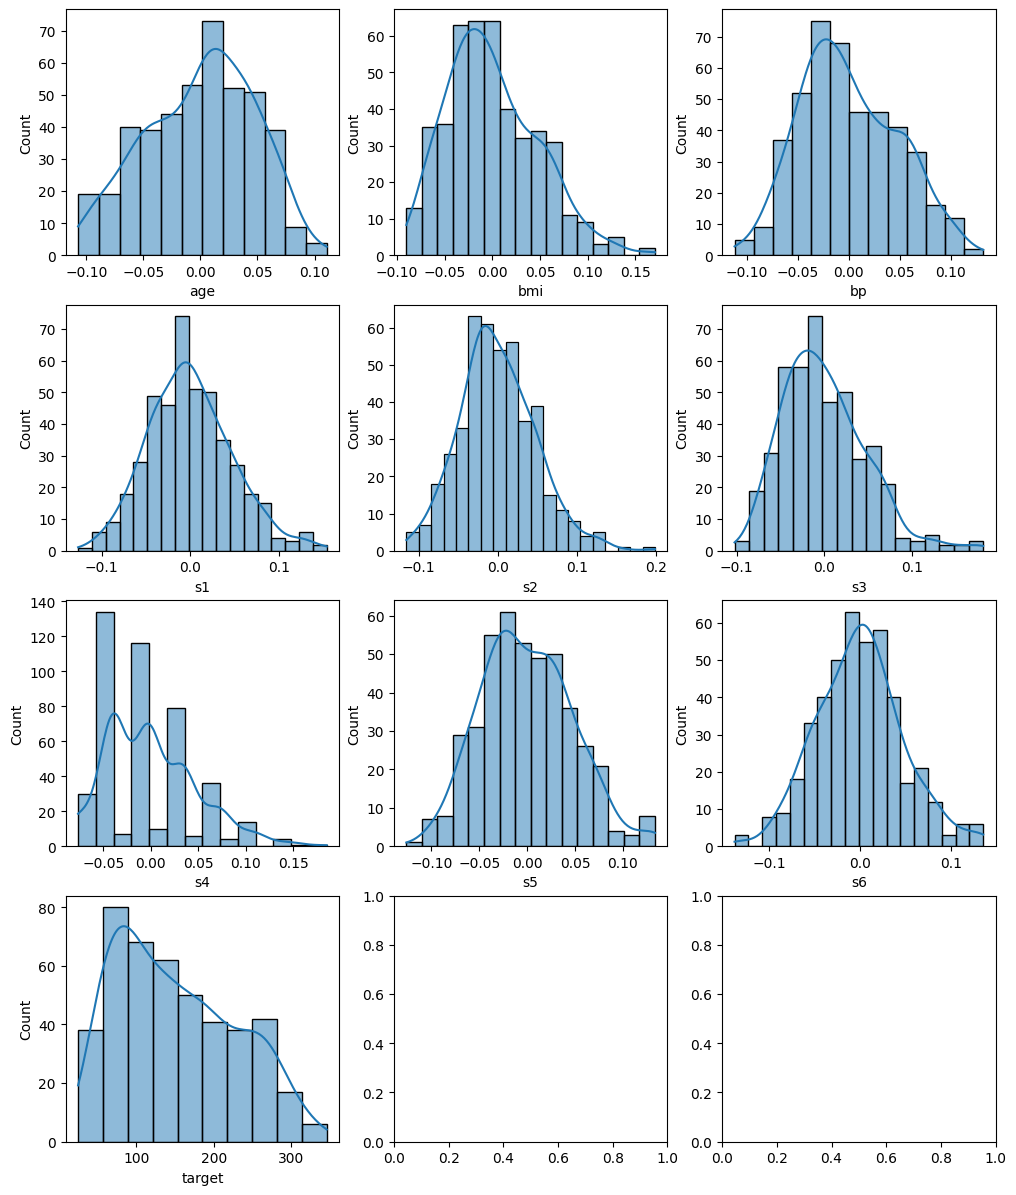

In [101]:
# Observation using histogram
ncols = 3
nrows = ceil(len(df.columns)/3)
nFeature = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,15), dpi=100)
for row in range(nrows):
    for col in range(ncols):
        if nFeature < len(df.columns):
            sns.histplot(df[df.columns[nFeature]], ax = axes[row][col], kde=True)
        nFeature += 1


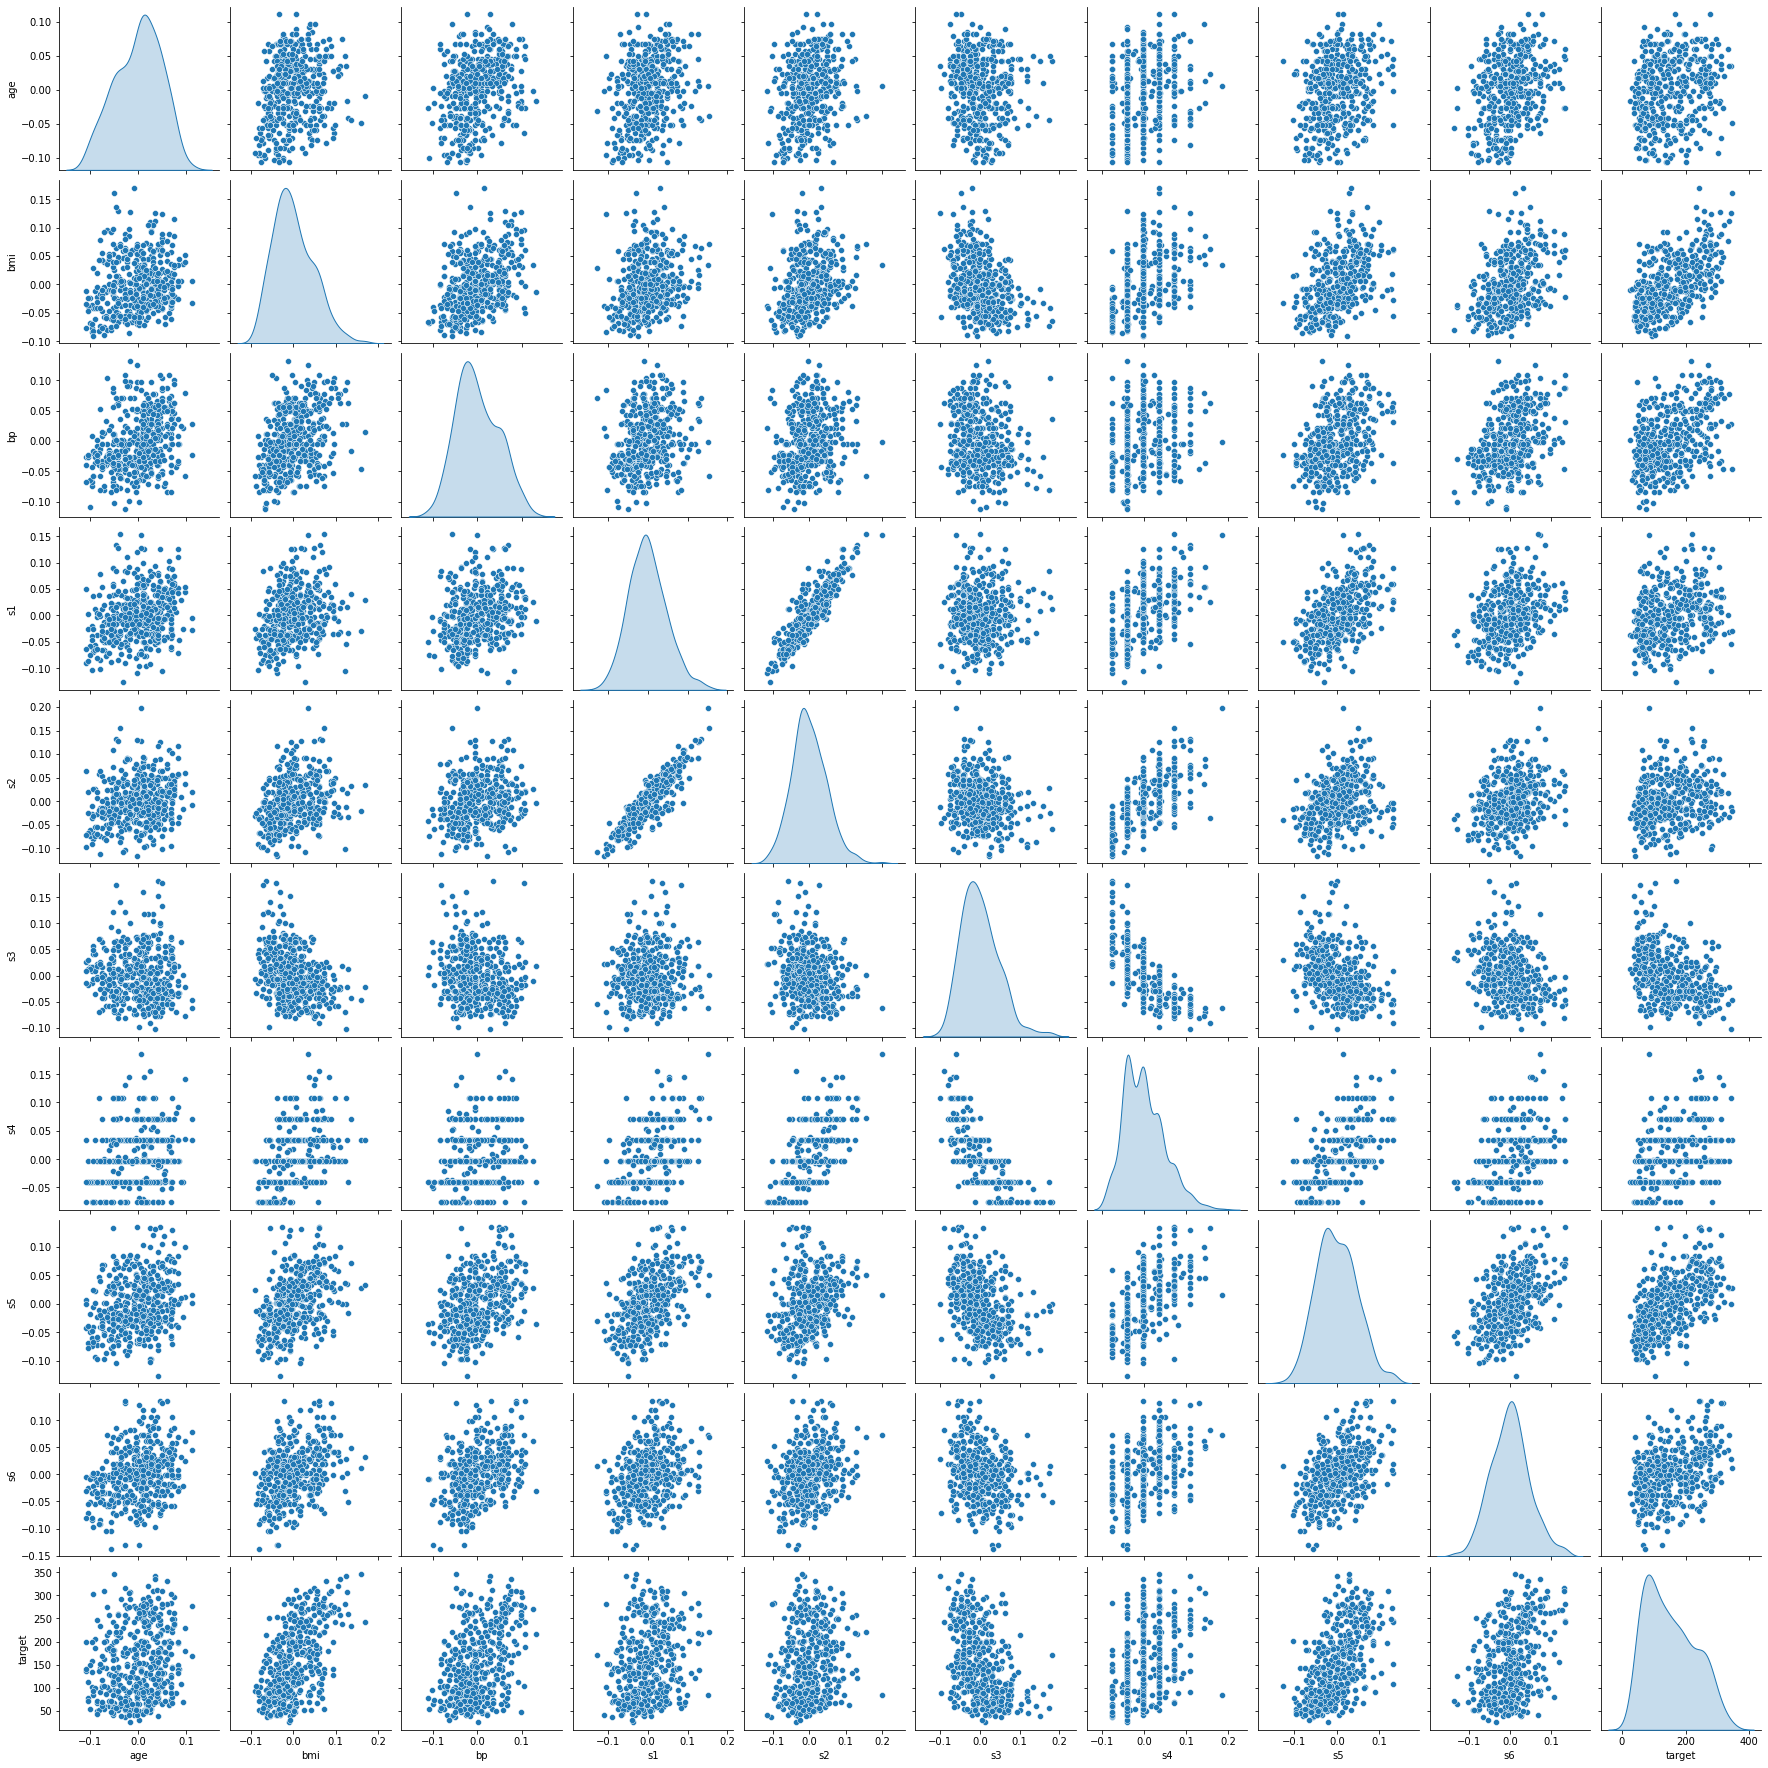

<Figure size 1440x864 with 0 Axes>

In [102]:
# Observation using pairplot
sns.pairplot(data=df, diag_kind='kde')
plt.figure(figsize=(20,12))
plt.show()

In [103]:
# From the figure above, 's1' and 's2' are already highly correlated.
# Therefore, 's2' is removed

# df.drop(['s2'], inplace=True, axis=1)

<a name="1-3"></a>
### 1-3 Removing outliers

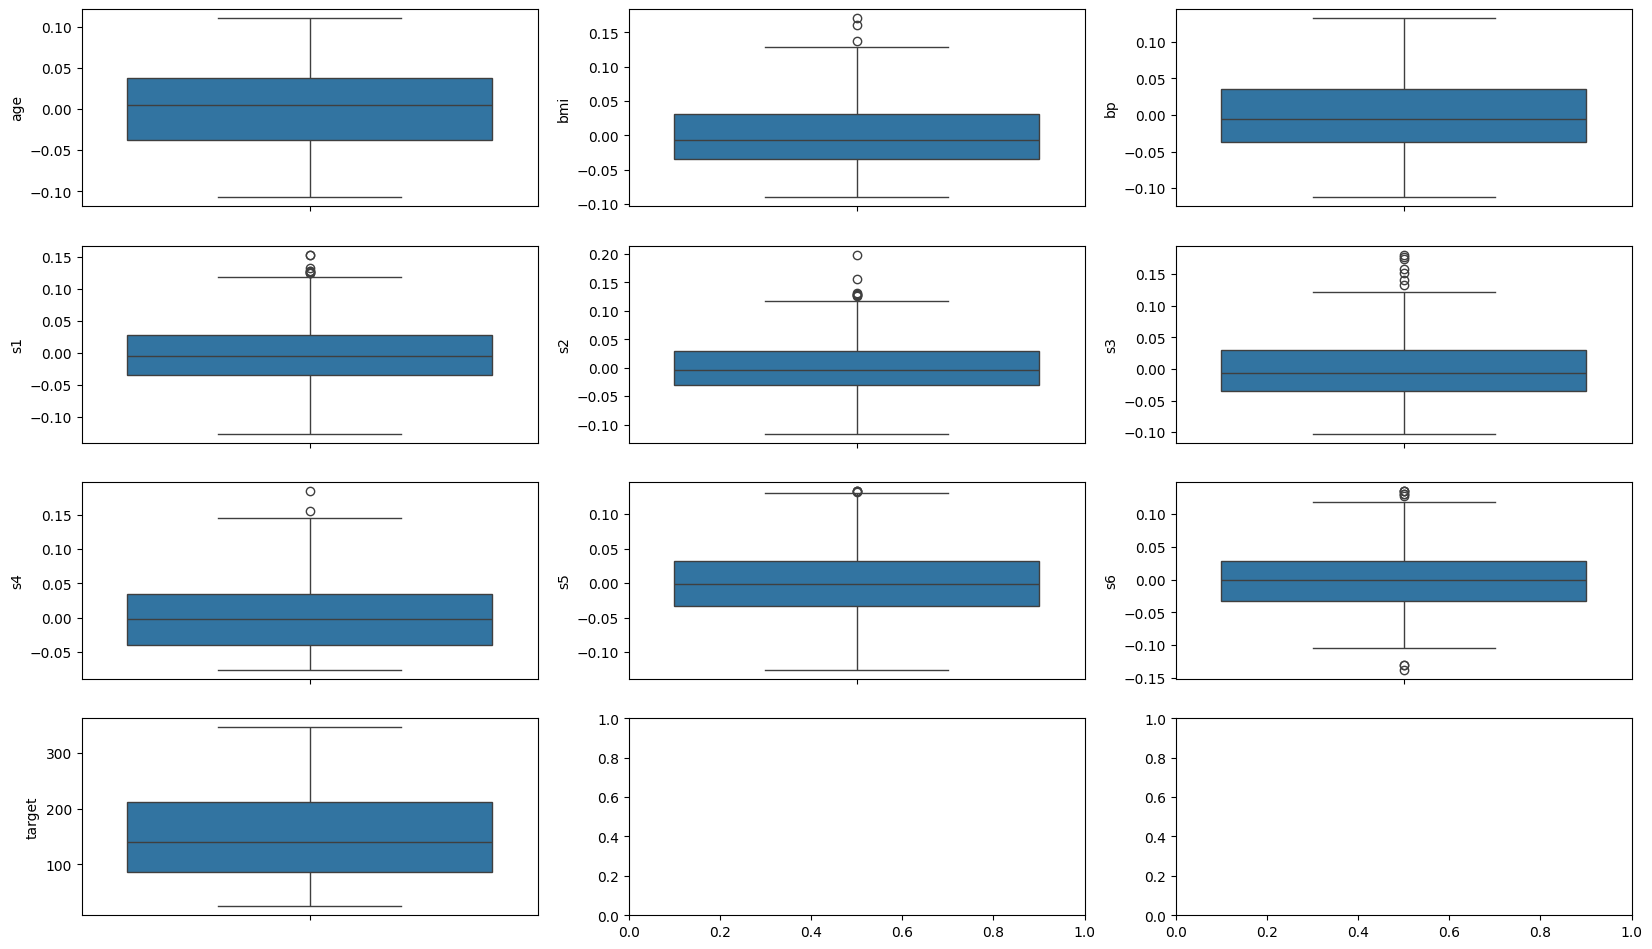

In [104]:
# Observation using boxplot
ncols = 3
nrows = ceil(len(df.columns)/3)
nFeature = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,12), dpi=100)
for row in range(nrows):
    for col in range(ncols):
        if nFeature < len(df.columns):
            sns.boxplot(df[df.columns[nFeature]], ax = axes[row][col])
        nFeature += 1

In [105]:
# From the figure above, several outliers could be removed
# bmi > 0.13
# s1 > 0.12
# s2 > 0.12
# s3 > 0.12
# s4 > 0.14
# s5 > 0.3
# s6 > 0.12 & s6 < -0.1

df_new = pd.DataFrame()

for i in range(df.shape[0]):
    if df['bmi'].iloc[i] < 0.13 and df['s1'].iloc[i] < 0.12 and df['s2'].iloc[i] < 0.12 and df['s3'].iloc[i] < 0.12 \
        and df['s4'].iloc[i] < 0.14 and df['s5'].iloc[i] < 0.3 and df['s6'].iloc[i] < 0.12 and df['s6'].iloc[i] > -0.12:
        df_new = pd.concat([df_new, df.iloc[i].to_frame().T])

df_new

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0


<a name="1-4"></a>
### 1-4 Data splitting & Normalization

In [106]:
X = df.drop(['target'], axis=1)
y = df['target']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=22)

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train

array([[-0.51719996,  0.95806128,  1.93680517, ..., -0.83740778,
        -0.72707494, -0.2205735 ],
       [-1.12602559, -0.2523904 ,  1.19932641, ...,  1.55131906,
         0.62743808, -0.13259334],
       [-1.12602559, -1.32580982,  0.24060401, ..., -1.63365006,
        -1.81561775,  0.04336699],
       ...,
       [ 0.31993528,  1.55186777, -0.88995093, ..., -0.00931581,
         0.88411261,  0.92316866],
       [ 0.31993528, -0.4579388 , -0.20188325, ..., -0.0411655 ,
        -0.27727797,  0.48326783],
       [-1.58264481, -0.22955169, -0.12813537, ..., -0.83740778,
        -0.89458684, -0.04461317]])

<a name="2"></a>
## 2 - Data Training

<a name="2-1"></a>
### 2-1 Cost function

It is important to find the 'cost' as close as possible to zero. <br>
The equation for the cost function, $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b \tag{2} $$ 

In [110]:
# Function to calculate the cost function, J(w,b)
def compute_cost(X, y, w, b):
    """
    Args:
        X (ndarray (m,n))   : Dataset with m rows and n columns (n refers to features) 
        y (ndarray (m,))    : Target data 
        w (ndarray (n,))    : Model parameters
        b (scalar)          : Model parameter 

    Returns:
        cost (scalar) : cost 
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b        # Equation (2)
        cost += (f_wb_i - y.iloc[i])**2
    cost /= (2 * m)
    return cost

<a name="2-2"></a>
### 2-2 Gradient descent

The minimum cost can be achieved by updating w and b until they converge <br>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$

In [111]:
# Function to calculate the gradient of w and b (eqs 4 & 5)
def compute_gradient(X, y, w, b):
    """
    Args:
        X (ndarray (m,n))   : Dataset with m rows and n columns (n refers to features) 
        y (ndarray (m,))    : Target data 
        w (ndarray (n,))    : Model parameters
        b (scalar)          : Model parameter 
    
    Returns:
        dj_db (ndarray (n,))    : The gradient of the cost w.r.t the parameter w.
        dj_dw (scalar)          : The gradient of the cost w.r.t the parameter b.
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y.iloc[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

In [112]:
# Function to achieve the minimum cost function, J(w,b) through iterations
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Args:
        X (ndarray (m,n))               : Dataset with m rows and n columns (n refers to features) 
        y (ndarray (n,))                : Target values
        w_in (ndarray (n,))             : Initial model parameters 
        b_in (scalar)                   : Initial model parameter 
        cost_function (function)        : Function to compute cost
        gradient_function (function)    : Function to compute the gradient 
        alpha (float)                   : Learning rate 
        num_iters (int)                 : Number of iterations to run gradient function 
    
    Returns:
        w (ndarray (n,))    : Updated values of parameters
        b (scalar)          : Updated value of parameter
    """
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    
    return w, b, J_history

<a name="2-3"></a>
### 2-3 Initial running of gradient descent function

In [113]:
# Initialization
initial_w = np.zeros(X_train.shape[1])
initial_b = 0
iterations = 1000
alpha = 1e-2

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(10):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train.iloc[i]}")

Iteration    0: Cost 14178.72   
Iteration  100: Cost  3057.49   
Iteration  200: Cost  1690.67   
Iteration  300: Cost  1503.36   
Iteration  400: Cost  1476.36   
Iteration  500: Cost  1471.85   
Iteration  600: Cost  1470.73   
Iteration  700: Cost  1470.20   
Iteration  800: Cost  1469.81   
Iteration  900: Cost  1469.48   
b,w found by gradient descent: 152.02,[ 1.06259148 26.00649804 11.49755643 -3.70264029 -3.65980981 -8.50548295
  2.03355782 25.02289868  2.08196269] 
prediction: 168.71, target value: 175.0
prediction: 174.01, target value: 181.0
prediction: 50.27, target value: 45.0
prediction: 153.10, target value: 116.0
prediction: 245.50, target value: 274.0
prediction: 133.74, target value: 214.0
prediction: 130.32, target value: 200.0
prediction: 113.31, target value: 102.0
prediction: 114.89, target value: 135.0
prediction: 72.97, target value: 37.0


<a name="2-4"></a>
### 2-4 Tuning learning rate

In [ ]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1]
initial_w = np.zeros(X_train.shape[1])
initial_b = 0
iterations = 1000
min_cost = -1

for alpha in alphas:
    w, b, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
    if min_cost == -1:
        min_cost = J_hist[-1]
        w_final = w
        b_final = b
        alpha_final = alpha
        J_hist_final = copy.deepcopy(J_hist)
    else:
        if J_hist[-1] < min_cost:
            min_cost = J_hist[-1]
            w_final = w
            b_final = b
            J_hist_final = copy.deepcopy(J_hist)
            alpha_final = alpha

In [87]:
print(f"Final w by gradient descent: {w_final}")
print(f"Final b by gradient descent: {b_final}")
print(f"Final alpha by gradient descent: {alpha_final}")

Final w by gradient descent: [  0.89814927  25.59463157  11.47938855 -23.90561881  13.5040752
  -1.06957834   2.31476618  33.66462075   2.0580356 ]
Final b by gradient descent: 152.0226628895183
Final alpha by gradient descent: 0.1


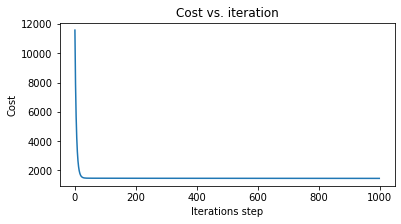

In [88]:
# plot cost versus iteration  
plt.figure(figsize=(6,3))
plt.plot(J_hist_final)
plt.title("Cost vs. iteration")
plt.ylabel('Cost')
plt.xlabel('Iterations step')
plt.show()

<a name="3"></a>
## 3 - Evaluation of model

In [89]:
# Define a function that predicts output
def predict_target(X, w_final, b_final, alpha_final):
    """
    Args:
        X (ndarray (m,n))       : Dataset with m rows and n columns (n refers to features) 
        w_final (ndarray (n,))  : Final model parameters
        b_final (scalar)        : Final model parameter
        alpha_final (_type_)    : Final learning rate

    Returns:
        y (ndarray (m,)) : Prediction of X
    """
    m,_ = X.shape
    y = np.zeros((m,))
    
    for i in range(m):
        y[i] = np.dot(X[i], w_final) + b_final
    
    return y

In [90]:
y_pred = predict_target(X_test, w_final, b_final, alpha_final)
y_pred

array([ 97.28448635, 234.97239887, 198.42336472, 174.4090395 ,
       177.19087015, 194.66955797,  92.30856241, 106.98111124,
       206.96779626, 246.79694514, 177.84446299,  85.03565975,
        94.45197446, 207.90384006,  87.66850286,  52.88525138,
        76.59631362, 176.40439335, 183.55436168, 227.51842836,
       153.47233159, 175.35786869, 153.22038381, 264.28246834,
       153.73450611, 217.02281436, 173.04236335, 103.11361245,
        66.60335137, 103.03878654, 127.47465755, 200.45711224,
        72.36055148, 216.94323498, 130.73167654, 140.93815217,
       152.55703021, 174.57864349, 160.69290135, 241.33563155,
       250.8239721 ,  67.61415605, 165.3860508 , 112.65732352,
       180.19173086, 188.70536703, 107.56386285, 195.47615673,
       192.27807974, 172.06575961,  85.96208371, 274.91026993,
       183.38228681, 140.84996318, 134.90156156,  78.64391126,
        92.00903703,  84.44675986,  91.76306984,  47.2804793 ,
       155.81561696, 161.6487053 , 113.38162587, 289.97

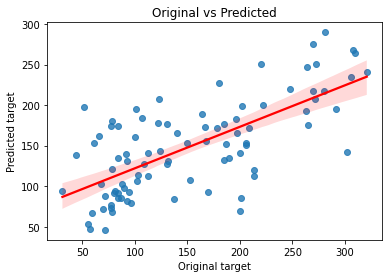

MAE: 42.50
MSE: 3196.59
RMSE: 56.54
R2: 0.48


In [91]:
# plt.title(f"Original vs Predicted (Degree={degree})")
plt.title(f"Original vs Predicted")
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws=dict(color="r"))
plt.xlabel("Original target")
plt.ylabel("Predicted target")
plt.show()

print(f"MAE: {metrics.mean_absolute_error(y_test,y_pred):.2f}")
print(f"MSE: {metrics.mean_squared_error(y_test,y_pred):.2f}")
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"RMSE: {rmse:.2f}")
r2 = metrics.r2_score(y_test,y_pred)
print(f"R2: {r2:.2f}")

In [92]:
# Comparison with using sklearn library
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f'R2 by scratch: {r2:.2f}')
print(f"R2 by sklearn: {metrics.r2_score(y_test, pred):.2f}")

R2 by scratch: 0.48
R2 by sklearn: 0.48
